<a href="https://colab.research.google.com/github/tranbuituanngoc/ML/blob/main/Lab_7_20130337_TranBuiTuanNgoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
X= iris['data']
Y= iris['target']
clf=svm.SVC(kernel="sigmoid", random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,  random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=cross_validate(clf,X,Y,scoring='accuracy',cv=10)
print(sorted(score.keys()))
print(np.mean(score['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [4]:
clf=RandomForestClassifier(n_estimators=100)
X= iris['data']
Y= iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,  random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=cross_validate(clf,X,Y,scoring='accuracy',cv=10)
print(sorted(score.keys()))
print(np.mean(score['test_score']))

['fit_time', 'score_time', 'test_score']
0.9666666666666666


In [5]:
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_selected, Y, test_size=0.3, train_size=0.7,  random_state = 1)
clf.fit(Xs_train,ys_train)
ys_pred = clf.predict(Xs_test)

sicm=confusion_matrix(ys_test, ys_pred)
rfuas=cross_validate(clf,X,Y,scoring='accuracy',cv=10)
rfups=cross_validate(clf, X, Y, cv=10, scoring='precision_macro')
rfurs=cross_validate(clf, X, Y, cv=10, scoring='recall_macro')
rfufs=cross_validate(clf, X, Y, cv=10, scoring='f1')
# print ("Confusion Matrix : \n", confusion_matrix(ys_test, ys_pred))
# print ("Accuracy : ", cross_validate(clf,X,Y,scoring='accuracy',cv=10))
# print ("Precision : ", cross_val_score(clf, X, Y, cv=10, scoring='precision_macro'))
# print ("Recall : ", cross_val_score(clf, X, Y, cv=10, scoring='recall_macro'))
# print ("F1 : ", cross_val_score(clf, X, Y, cv=10, scoring='f1'))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

In [6]:
# print("Accuracy :x : \n"+sorted(rfuas.keys()))
print("Accuracy : ",np.mean(rfuas['test_score']))
# print("Precision : \n"+sorted(rfups.keys()))
print("Precision : ",np.mean(rfups['test_score']))
# print("Recall : \n"+sorted(rfurs.keys()))
print("Recall : ",np.mean(rfurs['test_score']))
# print("F1 : \n"+sorted(rfuas.keys()))
print("F1 : ",np.mean(rfuas['test_score']))

Accuracy :  0.96
Precision :  0.9644444444444445
Recall :  0.96
F1 :  0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [7]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode
mnist = datasets.load_digits()

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
labels = np.zeros_like(clusters)
labels = np.zeros_like(clusters)
print(labels)
for i in range(3):
  print(i, '------------------------------')
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(mnist.target[mask])[0]
  print(labels) 
kas=accuracy_score(mnist.target, labels)
kps=precision_score(mnist.target, labels, average='micro')
krs=recall_score(mnist.target, labels, average='micro')
kfs=f1_score(mnist.target, labels, average='micro')
print("Accuracy : ",accuracy_score(mnist.target, labels))
print("Precision : ",precision_score(mnist.target, labels, average='micro'))
print("Recall : ",recall_score(mnist.target, labels, average='micro'))
print("F1 : ",f1_score(mnist.target, labels, average='micro'))

[0 0 0 ... 0 0 0]
0 ------------------------------
[False False False ... False  True  True]
[0 0 0 ... 0 3 3]
1 ------------------------------
[False  True  True ...  True False False]
[0 7 7 ... 7 3 3]
2 ------------------------------
[ True False False ... False False False]
[6 7 7 ... 7 3 3]
Accuracy :  0.2921535893155259
Precision :  0.2921535893155259
Recall :  0.2921535893155259
F1 :  0.2921535893155259


<ipython-input-9-36c42a551f71>:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


Random Forest

In [10]:
clf=RandomForestClassifier(n_estimators=100)
X= mnist['data']
Y= mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,  random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
sicm=confusion_matrix(y_test, y_pred)
rfas=cross_validate(clf,X,Y,scoring='accuracy',cv=10)
rfps=cross_validate(clf, X, Y, cv=10, scoring='precision_macro')
rfrs=cross_validate(clf, X, Y, cv=10, scoring='recall_macro')
rffs=cross_validate(clf, X, Y, cv=10, scoring='f1_macro')

In [11]:
print("Accuracy : ",np.mean(rfas['test_score']))
print("Precision : ",np.mean(rfps['test_score']))
print("Recall : ",np.mean(rfrs['test_score']))
print("F1 : ",np.mean(rffs['test_score']))

Accuracy :  0.9510211049037863
Precision :  0.9592070783851137
Recall :  0.9503835569315445
F1 :  0.9460664792203277


kNN

In [12]:
cancer = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,  random_state = 1)
cancer.fit(X_train,y_train)
y_pred = cancer.predict(X_test) 
knnas=cross_validate(clf,X,Y,scoring='accuracy',cv=10)
knnps=cross_validate(clf, X, Y, cv=10, scoring='precision_macro')
knnrs=cross_validate(clf, X, Y, cv=10, scoring='recall_macro')
knnfs=cross_validate(clf, X, Y, cv=10, scoring='f1_macro')
print("Accuracy : ",np.mean(knnas['test_score']))
print("Precision : ",np.mean(knnps['test_score']))
print("Recall : ",np.mean(knnrs['test_score']))
print("F1 : ",np.mean(knnfs['test_score']))

Accuracy :  0.9488081936685289
Precision :  0.9599899106969841
Recall :  0.9497987616099073
F1 :  0.9420276049100881


Naïve Bayes

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
sicm=confusion_matrix(y_test, y_pred)
gaas=cross_validate(clf,X,Y,scoring='accuracy',cv=10)
gaps=cross_validate(clf, X, Y, cv=10, scoring='precision_macro')
gars=cross_validate(clf, X, Y, cv=10, scoring='recall_macro')
gafs=cross_validate(clf, X, Y, cv=10, scoring='f1_macro')
print("Accuracy : ",np.mean(gaas['test_score']))
print("Precision : ",np.mean(gaps['test_score']))
print("Recall : ",np.mean(gars['test_score']))
print("F1 : ",np.mean(gafs['test_score']))

Accuracy :  0.9538175046554935
Precision :  0.9560224591370101
Recall :  0.9515669074647404
F1 :  0.9502812336632089


Compare

In [14]:
t= PrettyTable(['Algorithm', 'Accuracy','Precision','Recall','F1'])
t.add_row(['Random Forest',rfas,rfps,rfrs,rffs])
t.add_row(['kNN',knnas,knnps,knnrs,knnfs])
t.add_row(['Naïve Bayes',gaas,gaps,gars,gafs])
t.add_row(['K Means',kas,kps,krs,kfs])
print(t)

+---------------+-------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|   Algorithm   |                                                                        Accuracy                                                                       |                                                                       Precision                                                                       |                                                     

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [15]:
#code
# Supervised learning is better than Unsupervised learning

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


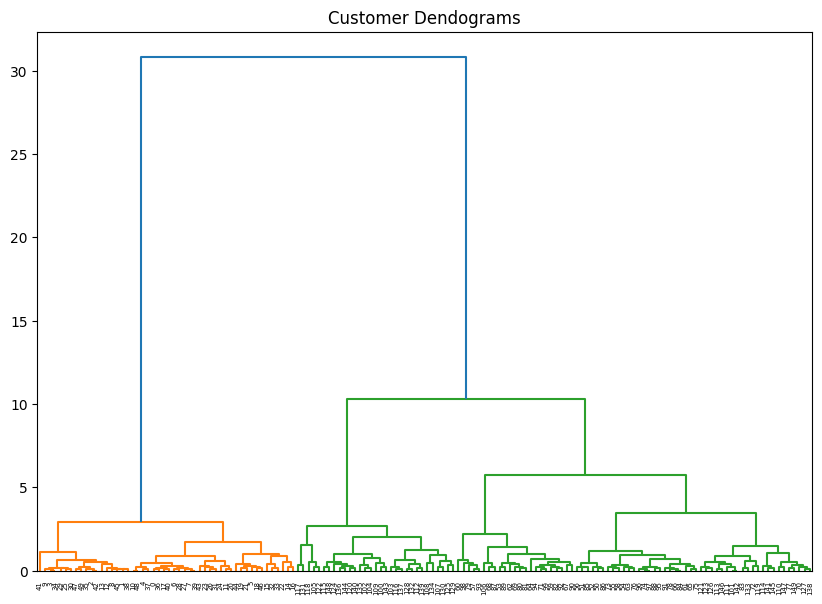

In [17]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
iris = load_iris()
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(iris.data[:, 1:4], method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





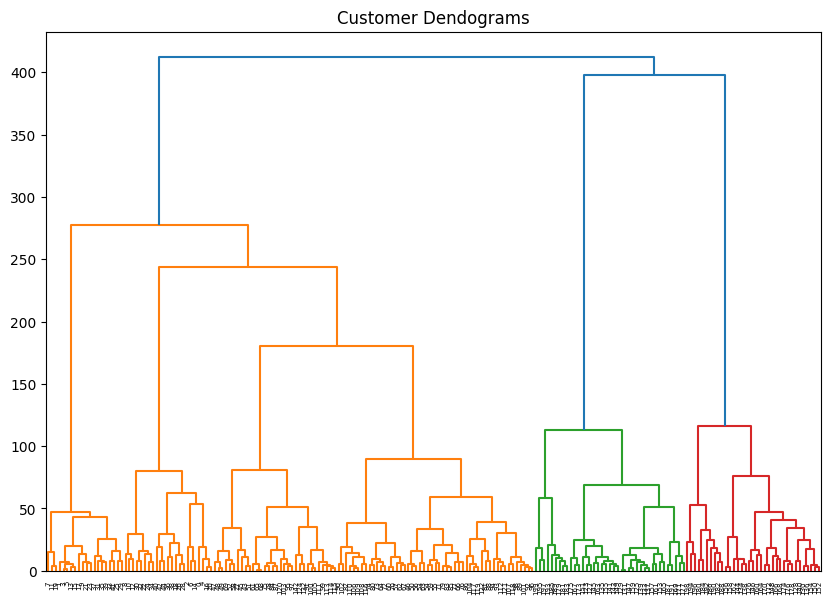

In [18]:
shopping = pd.read_csv('shopping-data.csv')
shopping = shopping.drop(['CustomerID', 'Genre'], axis = 1)
# shopping
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(shopping, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [19]:
scaler = StandardScaler()
shopping= scaler.fit_transform(shopping)
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(shopping.data)
clusters = kmeans.predict(shopping.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(3, 3)

In [20]:
sse = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0,init='k-means++', n_init=10)
 kmeans.fit(shopping)
 sse.append(kmeans.inertia_)
sse

[389.3861889564371,
 295.45624492135573,
 205.22514747675922,
 168.24758017556837,
 133.88887021131023,
 117.1691151701971,
 103.94423632967379,
 93.61455312876808,
 81.84894954697742]

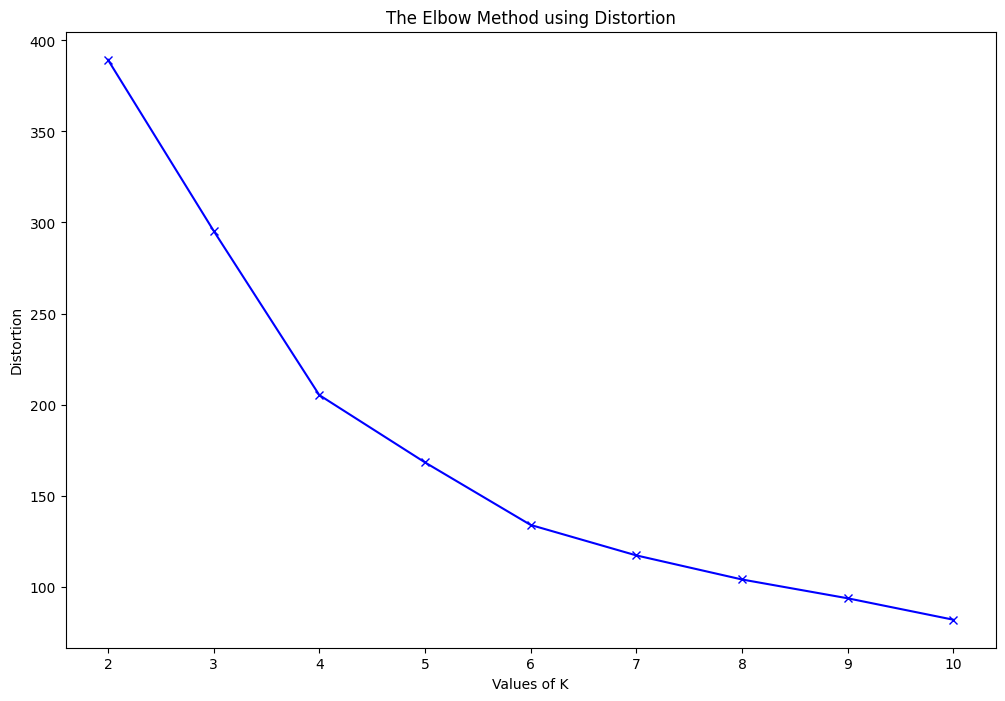

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, 11), sse, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
print(cluster.labels_)

[1 0 0 ... 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#Finally,
Save a copy in your Github. Remember renaming the notebook.